In [ ]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.models import Input, Model
from keras.layers import Dense
from scipy import sparse
from nltk.corpus import stopwords

In [ ]:
def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=stopwords.words('english')
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

In [ ]:
df = pd.read_excel("relations.xlsx")
df.head()

,Keywords,park,street,light,road,city,walking,sidewalk,cleanliness,sign,play,snow,picnic,broken,maintenance,trail,garbage,parking,pool,tree,bus,playground,bike,traffic,grass,path,car,pothole,pole,bench,table,running,station,metro,lawn,fountain,graffiti,track,streetlight,construction,...,washroom,lane,noise,crack,glass,sand,avenue,intersection,train,stop,branch,removal,hole,ice,free,line,property,access,trash,spot,lamp,facility,dirt,blossom,ride,dump,toilet,pedestrian,restaurant,asphalt,rusted,hiking,skiing,air,ball,weed,sit,crosswalk,damaged,accessible
0,park,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0,1,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1,street,0,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,light,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,road,0,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,city,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
str1 = ""
for i in range(len(df)):
  str1 += df.loc[i , 'Keywords']
  str1 += ' '

In [ ]:
str1

'park street light road city walking sidewalk cleanliness sign play snow picnic broken maintenance trail garbage parking pool tree bus playground bike traffic grass path car pothole pole bench table running station metro lawn fountain graffiti track streetlight construction sewer view driveway river rink biking lake jogging forest skating bin underpass cycling pond building fence flower drain beach bbq bathroom washroom lane noise crack glass sand avenue intersection train stop branch removal hole ice free line property access trash spot lamp facility dirt blossom ride dump toilet pedestrian restaurant asphalt rusted hiking skiing air ball weed sit crosswalk damaged accessible '

In [ ]:
texts = [x for x in df['Keywords']]

In [ ]:
text = str1

In [ ]:
texts[10]

'snow'

In [ ]:
# Defining the window for context
window = 1

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

In [ ]:
columns = list(df.columns.values.tolist())

In [ ]:
type(df.iloc[0,1])

numpy.int64

In [ ]:
# for text in texts:

    # Cleaning the text
# text = text_preprocessing(text)

    # Appending to the all text list
all_text += texts 

    # Creating a context dictionary
for i , word in enumerate(texts):
  for j in range(100):
    if df.iloc[i , j+1] == 1:
      lis = []
      lis.append(texts[i])
      lis.append(columns[j+1])
      # print(lis) 
      word_lists.append(lis)
      # print(i)

In [ ]:
df.iloc[0,1]

1

In [ ]:
columns[100]

'accessible'

In [ ]:
unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

In [ ]:
# Getting all the unique words 
words = list(unique_word_dict.keys())

In [ ]:
word_lists

[['park', 'park'],
 ['park', 'light'],
 ['park', 'city'],
 ['park', 'walking'],
 ['park', 'cleanliness'],
 ['park', 'sign'],
 ['park', 'snow'],
 ['park', 'picnic'],
 ['park', 'maintenance'],
 ['park', 'trail'],
 ['park', 'garbage'],
 ['park', 'parking'],
 ['park', 'pool'],
 ['park', 'tree'],
 ['park', 'playground'],
 ['park', 'grass'],
 ['park', 'path'],
 ['park', 'pole'],
 ['park', 'bench'],
 ['park', 'table'],
 ['park', 'running'],
 ['park', 'lawn'],
 ['park', 'fountain'],
 ['park', 'graffiti'],
 ['park', 'construction'],
 ['park', 'view'],
 ['park', 'rink'],
 ['park', 'lake'],
 ['park', 'jogging'],
 ['park', 'forest'],
 ['park', 'skating'],
 ['park', 'bin'],
 ['park', 'cycling'],
 ['park', 'pond'],
 ['park', 'fence'],
 ['park', 'flower'],
 ['park', 'bbq'],
 ['park', 'bathroom'],
 ['park', 'washroom'],
 ['park', 'noise'],
 ['park', 'sand'],
 ['park', 'avenue'],
 ['park', 'hole'],
 ['park', 'ice'],
 ['park', 'line'],
 ['park', 'property'],
 ['park', 'access'],
 ['park', 'trash'],
 ['p

In [ ]:
# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = np.asarray(X)
Y = np.asarray(Y)

2147it [00:00, 193834.66it/s]


In [ ]:
# Defining the size of the embedding
embed_size = 2

In [ ]:
# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [ ]:
# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=25
    )

Epoch 1/25
9/9 [==============================] - 1s 3ms/step - loss: 4.6044
Epoch 2/25
9/9 [==============================] - 0s 2ms/step - loss: 4.6006
Epoch 3/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5971
Epoch 4/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5937
Epoch 5/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5901
Epoch 6/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5867
Epoch 7/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5833
Epoch 8/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5798
Epoch 9/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5762
Epoch 10/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5726
Epoch 11/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5690
Epoch 12/25
9/9 [==============================] - 0s 2ms/step - loss: 4.5652
Epoch 13/25
9/9 [==============================] - 0s 2ms/step - loss: 4.

In [ ]:
# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

In [ ]:
# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

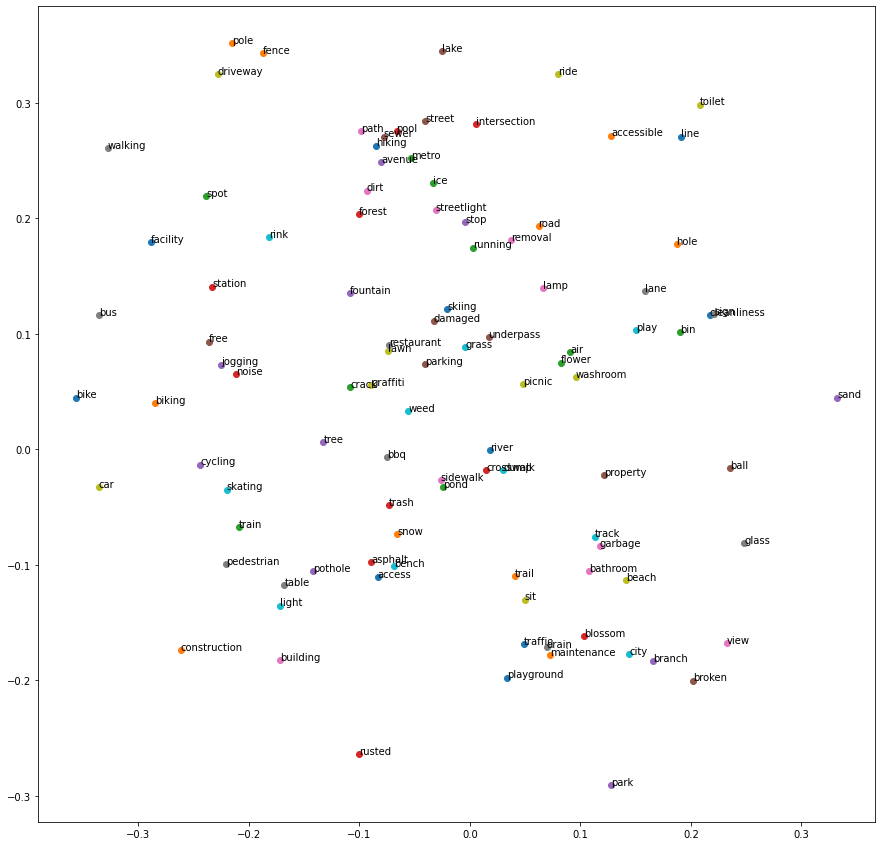

In [ ]:
# Ploting the embeddings
plt.figure(figsize=(15, 15))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))